## Credit Score Classification

There are three credit scores that banks and credit card companies use to label their customers:
1. Good
2. Standard
3. Poor

A person with a good credit score will get loans from any bank and financial institution. cores.

In [185]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as w
w.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_style('whitegrid')
pd.set_option('display.max_column',60)

In [186]:
df = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Credit Score Data.csv")

In [187]:
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [189]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [190]:
df.duplicated().sum()

0

In [191]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [192]:
df['Credit_Score'].value_counts() 

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

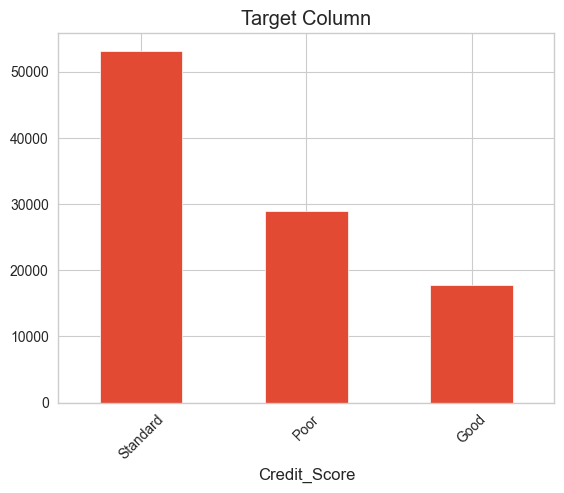

In [193]:
df['Credit_Score'].value_counts().plot( kind = "bar")
plt.xticks( rotation = 45)

plt.title('Target Column')
plt.show()

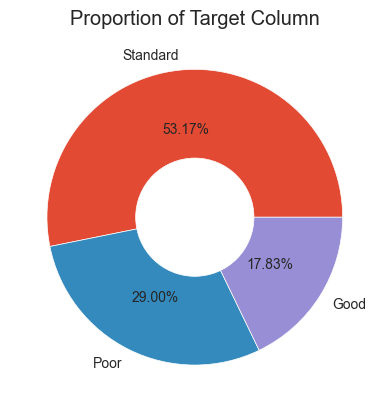

In [194]:
plt.pie( 
    x = df['Credit_Score'].value_counts() , 
    labels = df['Credit_Score'].value_counts().keys() ,
    autopct = "%1.2f%%"
)

circle = plt.Circle( (0,0), radius = 0.4 , fc = "white")
plt.gca().add_artist(circle)

plt.title('Proportion of Target Column')
plt.show()

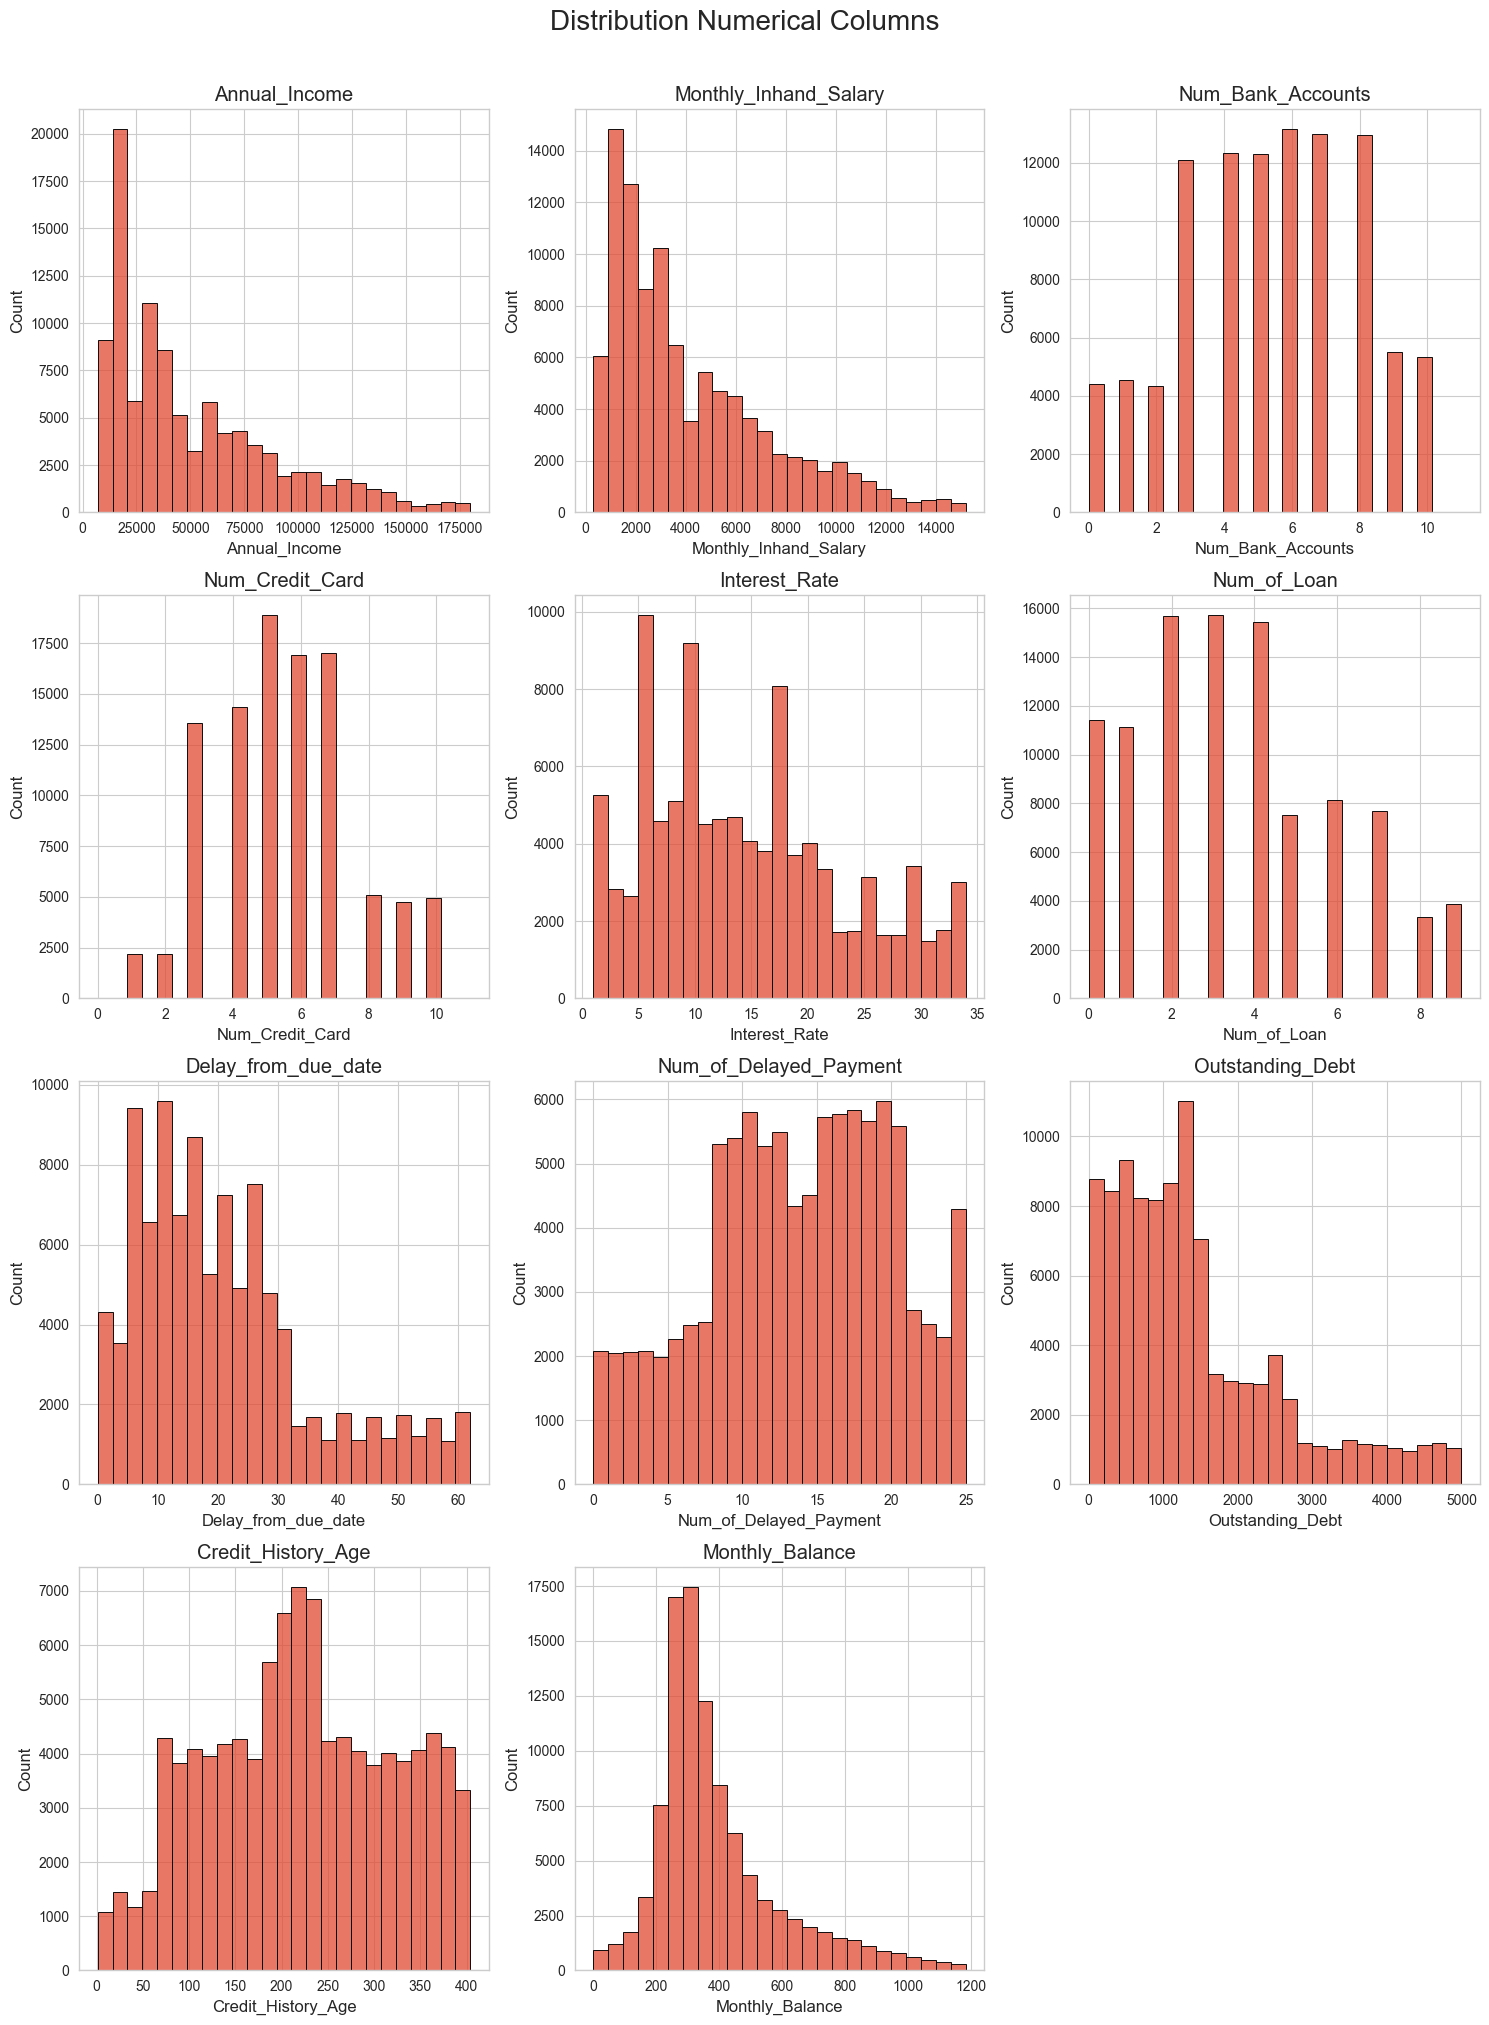

In [195]:
columns = ["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", 
           "Delay_from_due_date", "Num_of_Delayed_Payment", "Outstanding_Debt", "Credit_History_Age", "Monthly_Balance"]

plt.figure( figsize = (15,20) )

for index , col in enumerate(columns, 1):
    plt.subplot(4, 3, index)
    sns.histplot( df[col], linewidth = 0.65, edgecolor = "k" , bins = 25)
    plt.title(col)

plt.suptitle("Distribution Numerical Columns", size = 20 , y = 1.01)
plt.tight_layout()
plt.show()

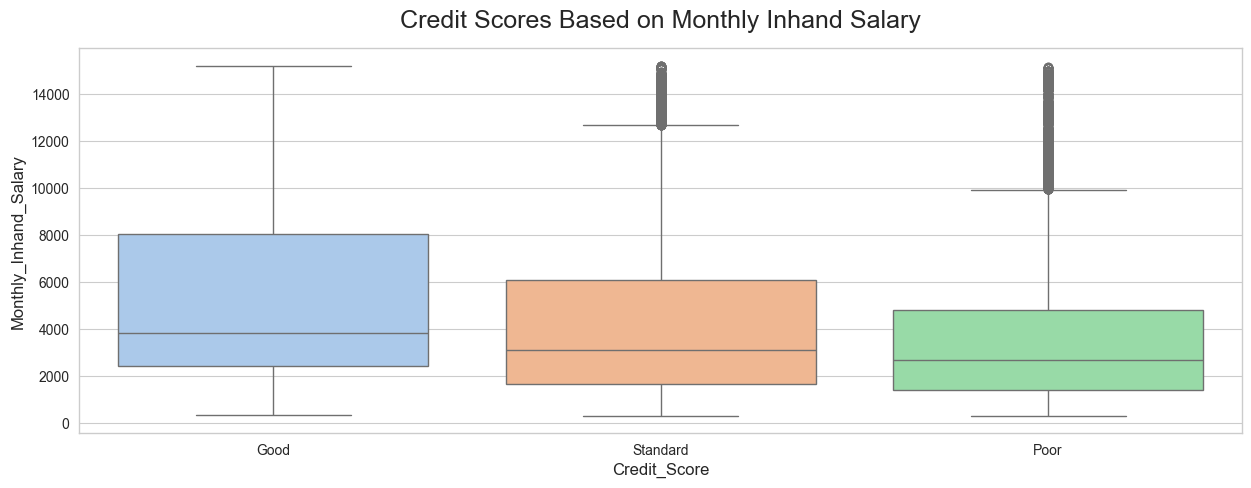

In [196]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Monthly_Inhand_Salary" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Monthly Inhand Salary', size = 18, pad = 15)
plt.show()

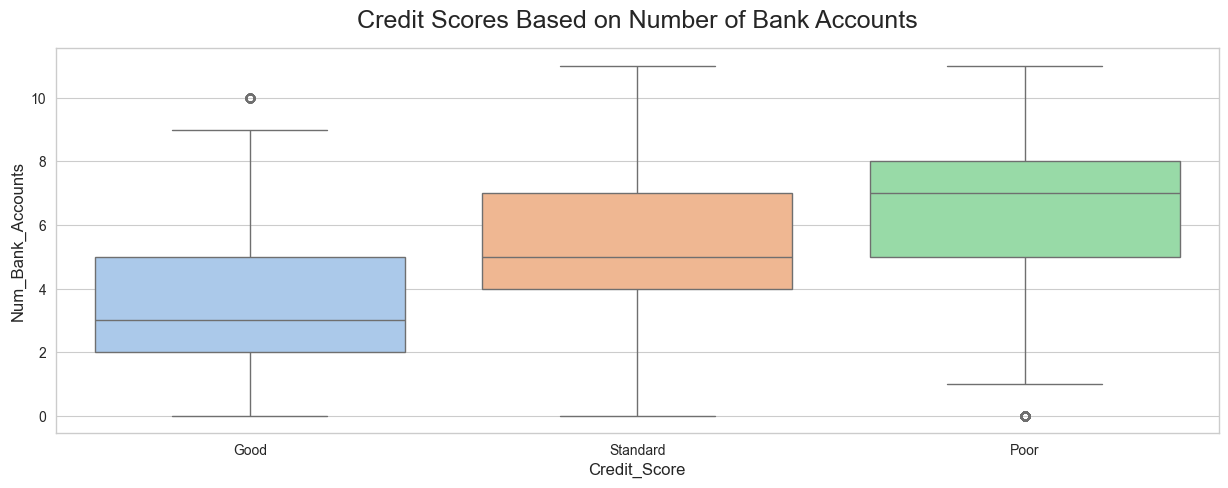

In [197]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Num_Bank_Accounts" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Number of Bank Accounts', size = 18, pad = 15)
plt.show()

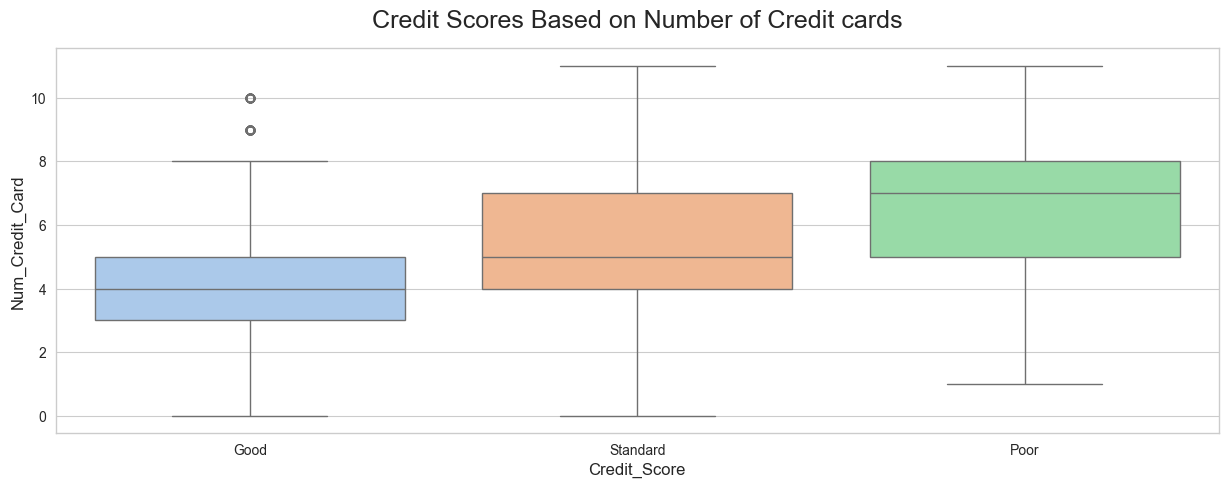

In [198]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Num_Credit_Card" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Number of Credit cards', size = 18, pad = 15)
plt.show()

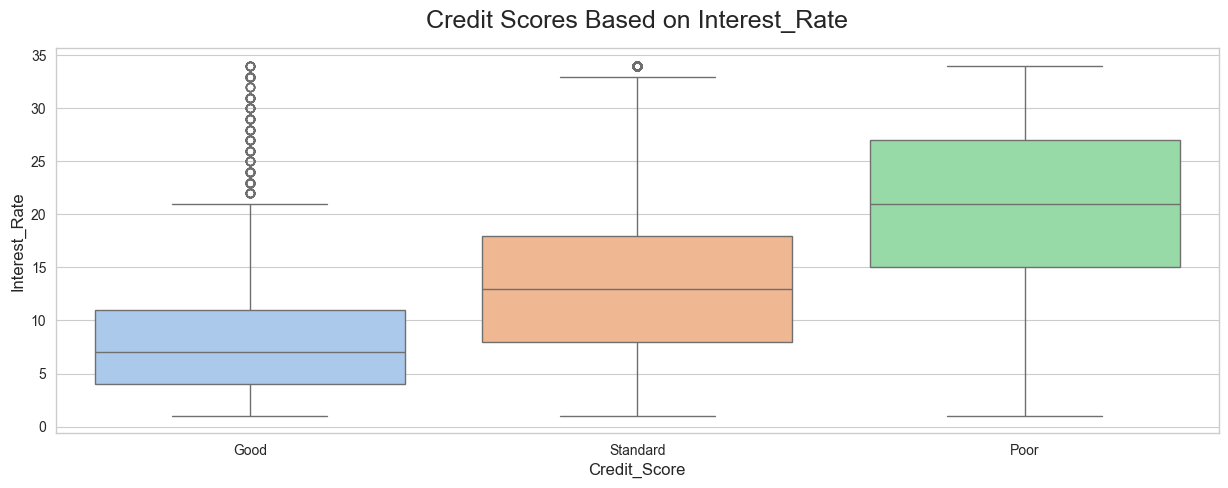

In [199]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Interest_Rate" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Interest_Rate', size = 18, pad = 15)
plt.show()

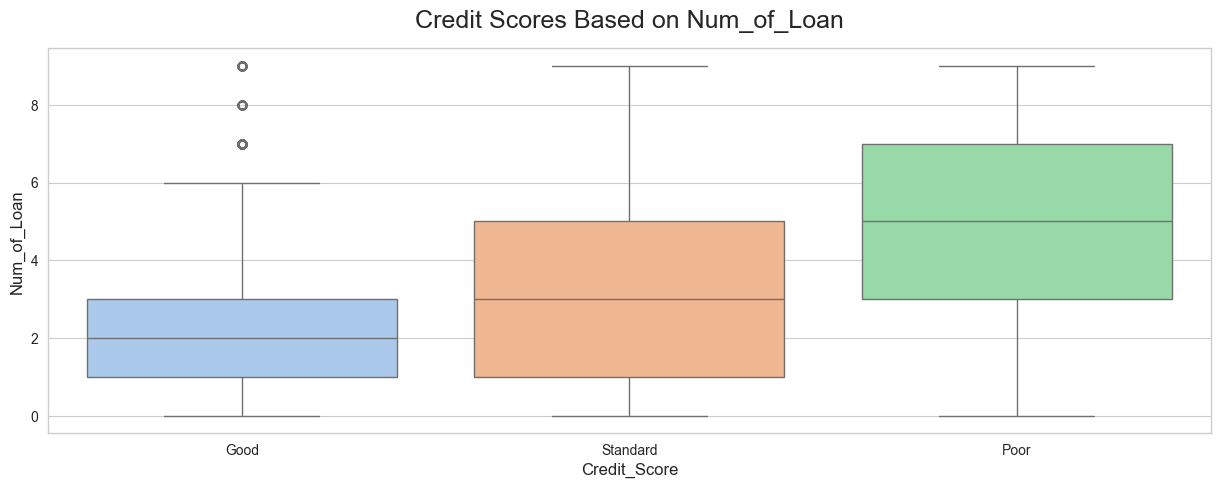

In [200]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Num_of_Loan" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Num_of_Loan', size = 18, pad = 15)
plt.show()

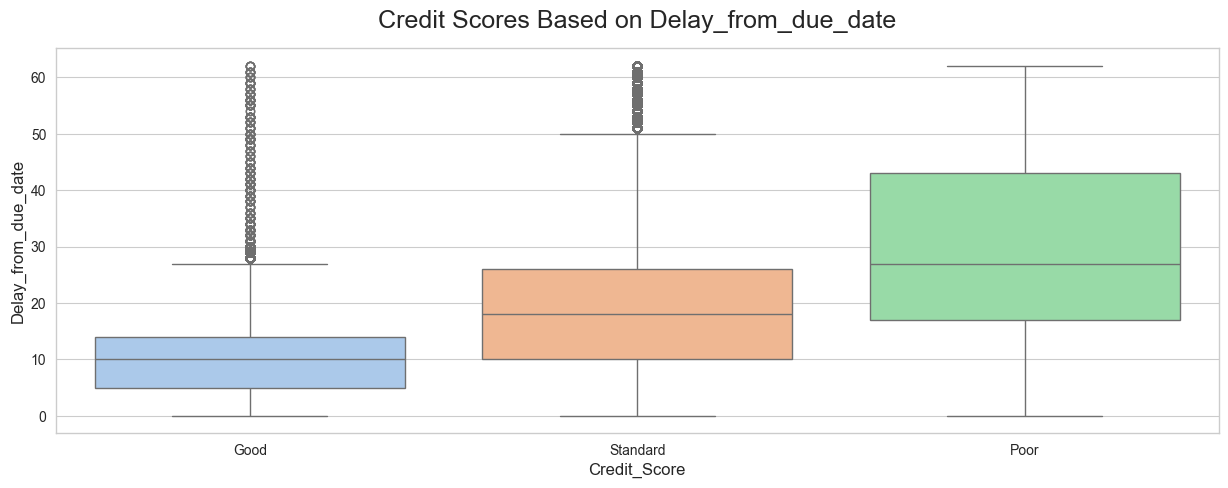

In [201]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Delay_from_due_date" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Delay_from_due_date', size = 18, pad = 15)
plt.show()

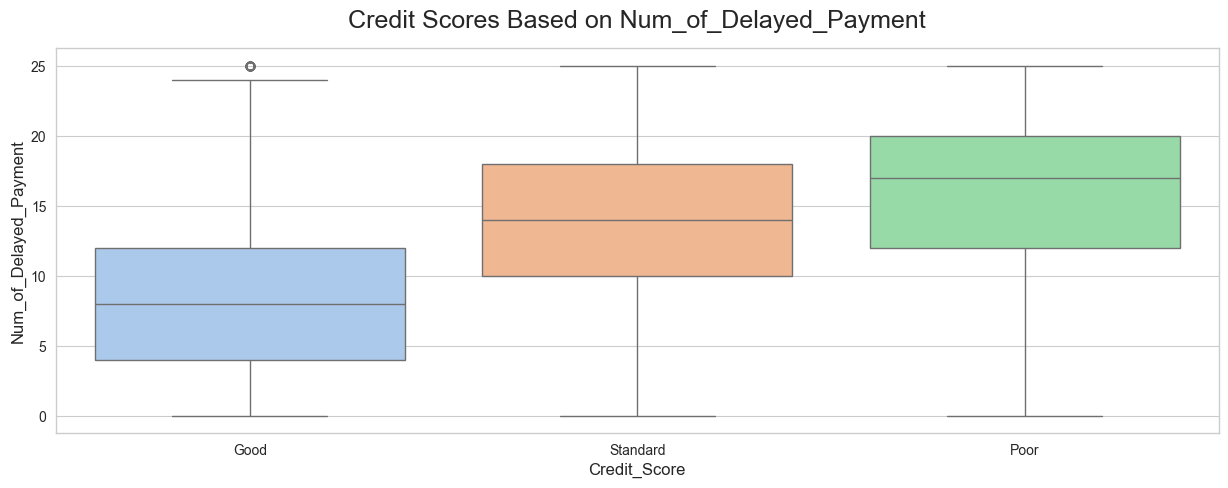

In [202]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Num_of_Delayed_Payment" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Num_of_Delayed_Payment', size = 18, pad = 15)
plt.show()

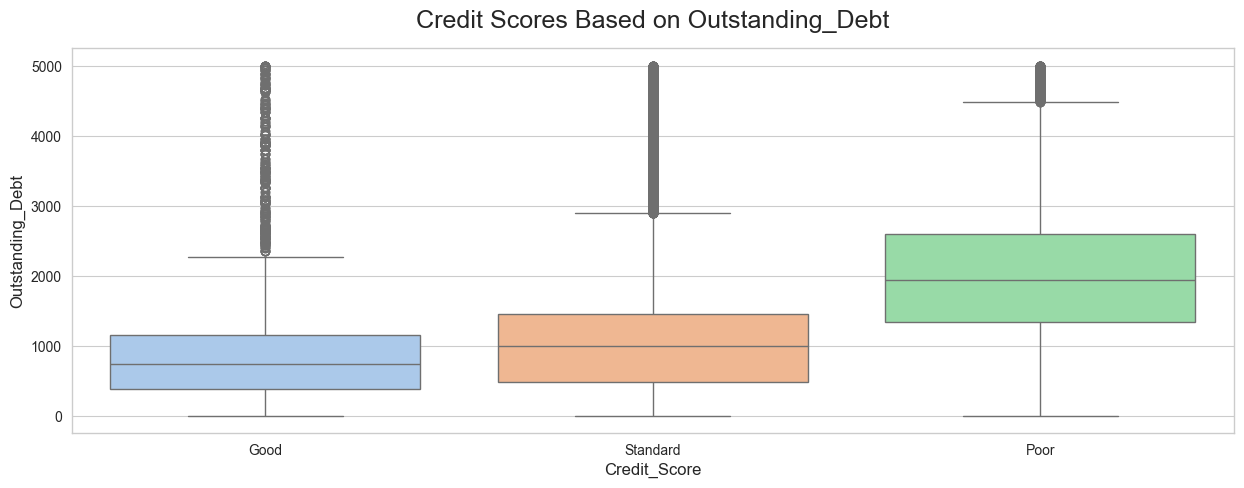

In [203]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Outstanding_Debt" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Outstanding_Debt', size = 18, pad = 15)
plt.show()

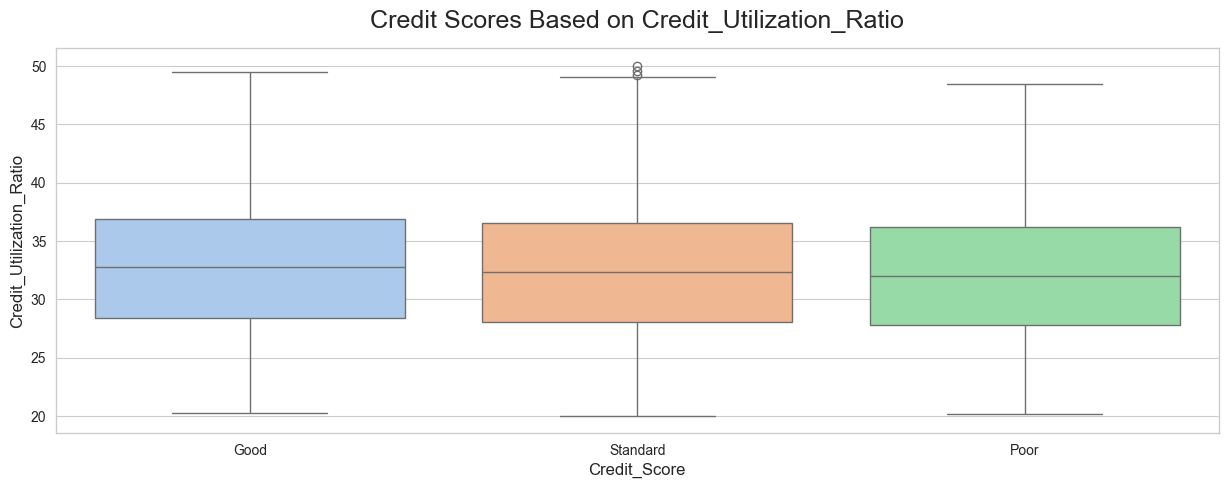

In [204]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Credit_Utilization_Ratio" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Credit_Utilization_Ratio', size = 18, pad = 15)
plt.show()

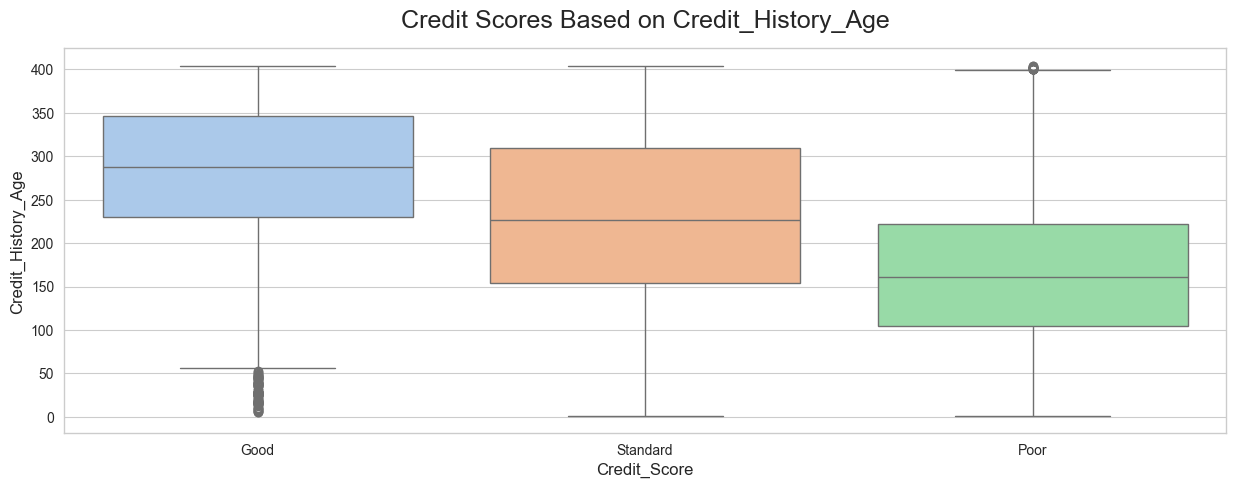

In [205]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Credit_History_Age" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Credit_History_Age', size = 18, pad = 15)
plt.show()

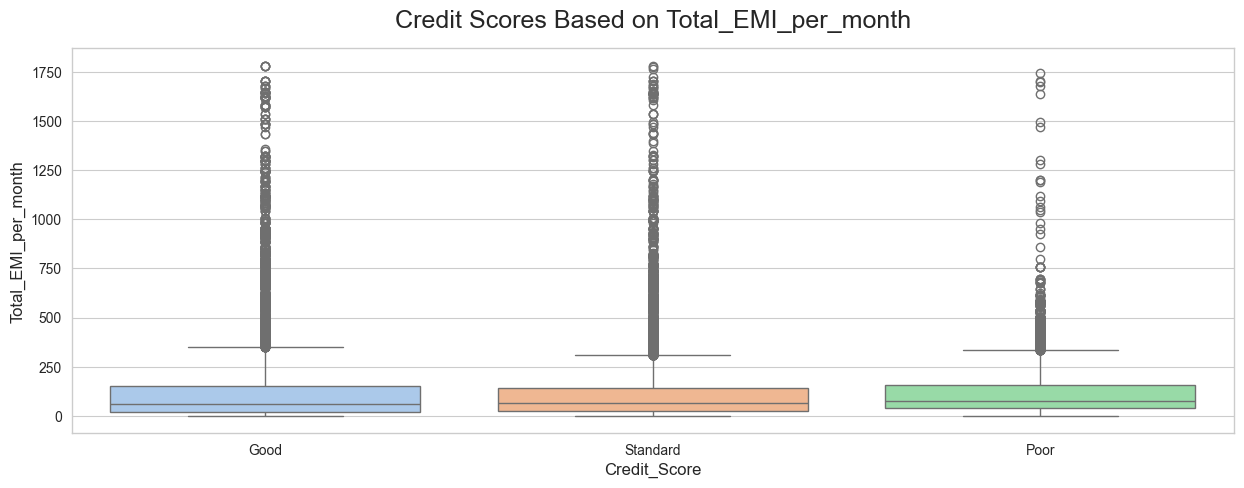

In [206]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Total_EMI_per_month" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Total_EMI_per_month', size = 18, pad = 15)
plt.show()

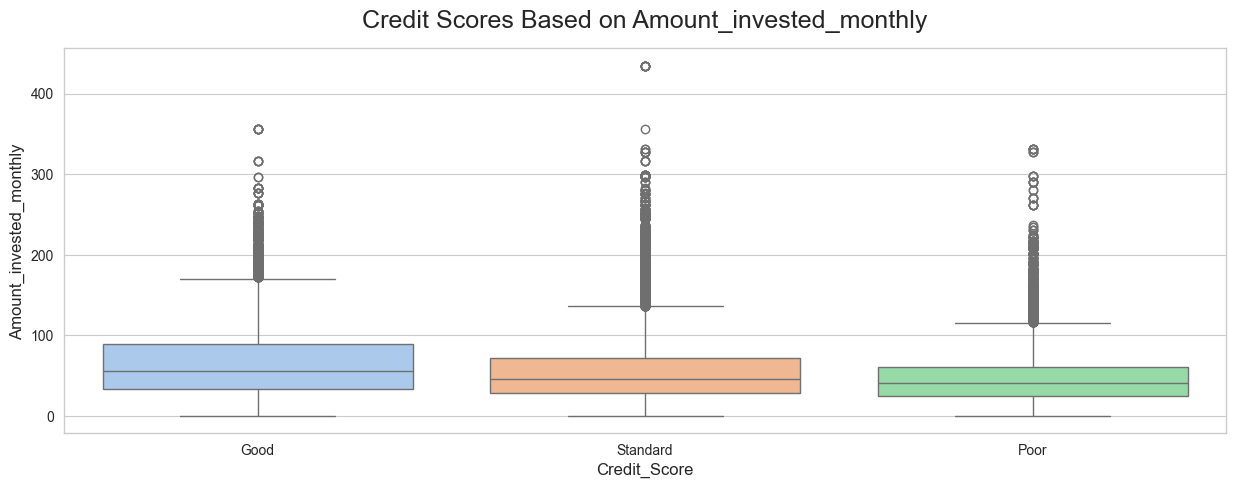

In [207]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Amount_invested_monthly" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Amount_invested_monthly', size = 18, pad = 15)
plt.show()

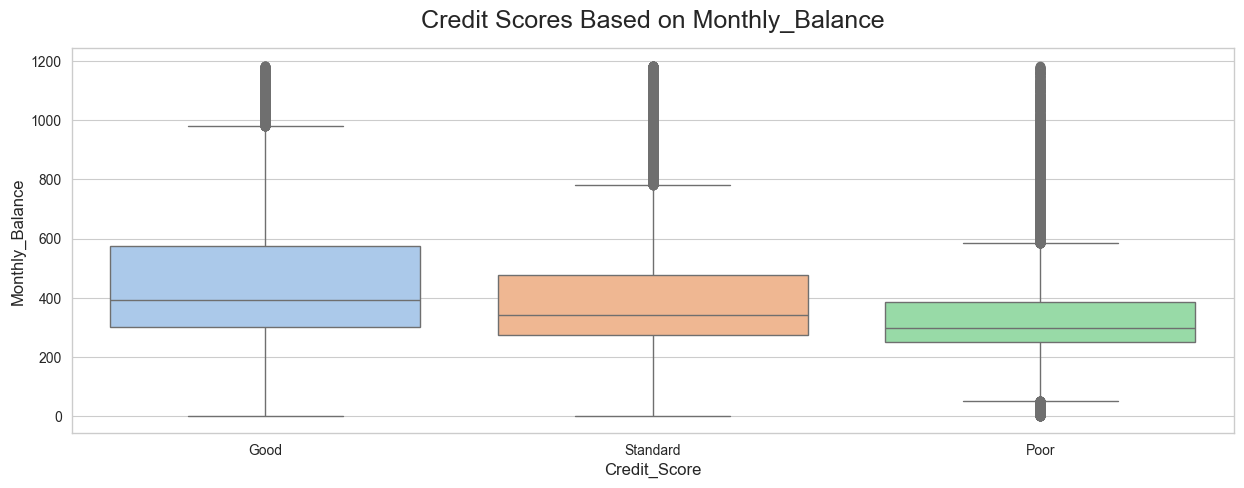

In [208]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Monthly_Balance" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Monthly_Balance', size = 18, pad = 15)
plt.show()

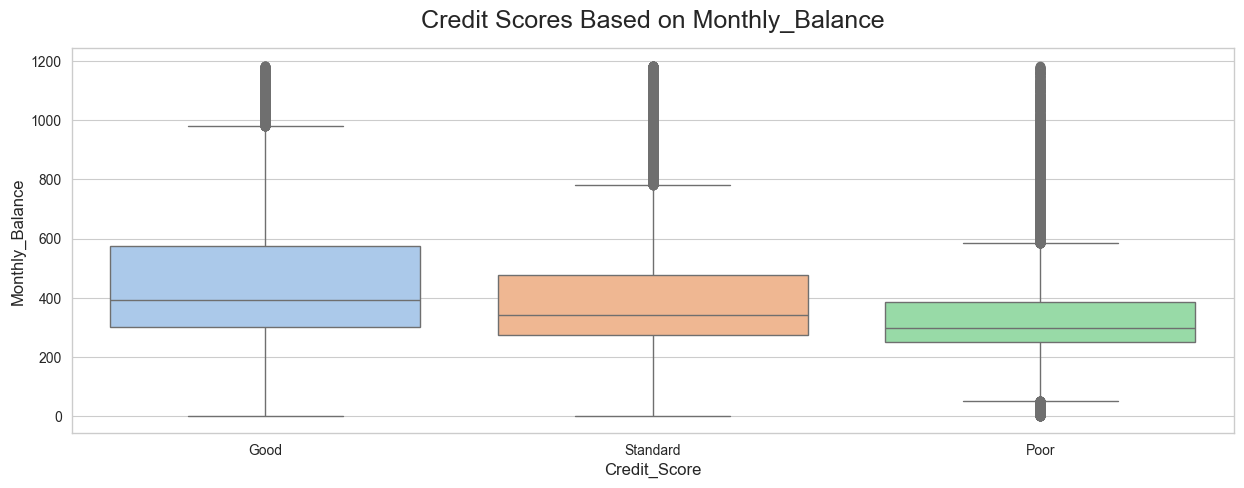

In [209]:
plt.figure( figsize = (15,5))

sns.boxplot( df, x = 'Credit_Score', y = "Monthly_Balance" , palette = sns.color_palette('pastel') , )

plt.title('Credit Scores Based on Monthly_Balance', size = 18, pad = 15)
plt.show()

## Credit Score Classification Model

One more important feature (Credit Mix) in the dataset is valuable for determining credit scores.
 The credit mix feature tells about the types of credits and loans you have taken.

In [210]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1, 
                                         "Good": 2, 
                                         "Bad": 0})

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [222]:
x = df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]
y = df[["Credit_Score"]]

In [223]:
x_train , x_test, y_train, y_test = train_test_split( x, y, test_size = 0.33, random_state = 42)

In [224]:
rfc = RandomForestClassifier()

In [225]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [226]:
train_pred = rfc.predict( x_train )

In [227]:
print(classification_report( y_train , train_pred ))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     11962
        Poor       1.00      1.00      1.00     19365
    Standard       1.00      1.00      1.00     35673

    accuracy                           1.00     67000
   macro avg       1.00      1.00      1.00     67000
weighted avg       1.00      1.00      1.00     67000



In [228]:
test_pred = rfc.predict( x_test )

In [229]:
print(classification_report( y_test , test_pred ))

              precision    recall  f1-score   support

        Good       0.77      0.76      0.77      5866
        Poor       0.79      0.83      0.81      9633
    Standard       0.82      0.81      0.82     17501

    accuracy                           0.81     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.81      0.81      0.81     33000



In [236]:
len(rfc.feature_importances_)

12

In [237]:
len(x.columns)

12

In [239]:
fi = pd.DataFrame( {"Importances": rfc.feature_importances_ *100, 'Columns': x.columns} )

In [240]:
fi

,Importances,Columns
0,6.641605,Annual_Income
1,6.699392,Monthly_Inhand_Salary
2,3.967323,Num_Bank_Accounts
3,5.240167,Num_Credit_Card
4,9.872155,Interest_Rate
5,3.634587,Num_of_Loan
6,8.971282,Delay_from_due_date
7,6.356509,Num_of_Delayed_Payment
8,9.319189,Credit_Mix
9,15.005686,Outstanding_Debt


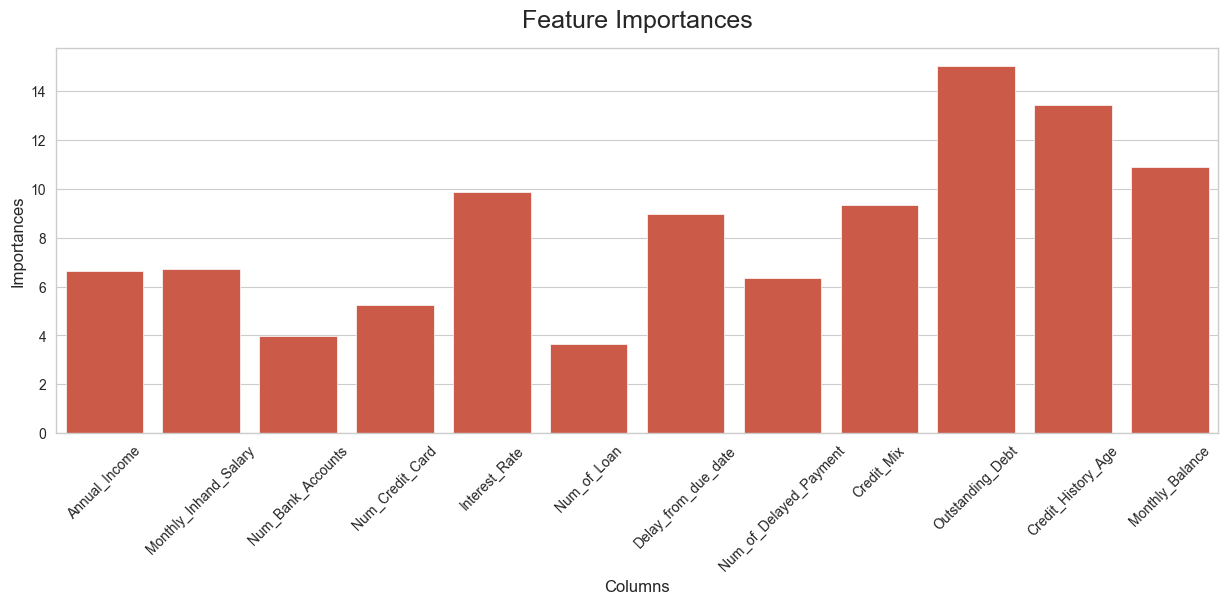

In [247]:
plt.figure( figsize = (15,5))

sns.barplot( fi,  x = 'Columns', y = 'Importances')

plt.title( 'Feature Importances', size = 18, pad = 15)
plt.xticks(rotation = 45)
plt.show()